# Mini-Projet: Le Pendule
## Introduction:

Dans ce projet, on cherche à étudier le comportement d'un pendule dont le mouvement est décrit par une équation différentielle (E.D.) de la forme:

\begin{equation*}
    a \frac{d^2y}{dx^2} + b \frac{dy}{dx} + cy = f(x)
\end{equation*}

$$ \frac{\mathrm{d}^2\theta}{\mathrm{d}t^2}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^2\theta=F_e\sin(\Omega_e t). $$

Afin de traiter cette équation on la décompose en deux équations avec un changement de variable car la méthode que l'on employera plus tard ne permet que de résoudre des E.D.s au premier order.

\begin{equation*}
    \frac{dy}{dx} = z
\end{equation*}

\begin{equation*}
    \frac{dz}{dx} = \frac{1}{a} (f(x) - bz - cy)
\end{equation*}

Pour la résolution on appliquera la méthode Runge-Kutta (R.K.) aux deux équations simultanement. Cette méthode nous permet de calculer $\frac{dy}{dx}(x)$ et $y(x)$ en tout point $x$.

Dans le cas appliqué au pendule, $x=t$ (temps), $y=\theta$ (angle), et $z=\frac{d\theta}{dt}$.



In [2]:
import numpy as np
import matplotlib.pyplot as plt

imsize = 250
plt.style.use("dark_background")

theta0, thetadot0 = np.radians(10), 0

def rk4(a, b, c, cf, start, stop, step, y0, yprime0, Fe, Omegae, approx=True):

    if cf == None :

        def g(x, y, z):
            if approx == True:
                g = (-b * z - c * y) / a
            else:
                g = (-b * z - c(y)) / a
            return g

    else:

        def g(x, y, z):
            if approx == True:
                g = (cf(x, Fe, Omegae) - b * z - c * y ) / a
            else:
                g = (cf(x, Fe, Omegae) - b * z - c(y)) / a
            return g

    length = int((stop-start)/step)
    result = np.zeros((length, 3))

    result[0,0] = start
    result[0,1] = y0
    result[0,2] = yprime0

    x = result[:, 0]
    y = result[:, 1]
    z = result[:, 2]

    for i in range(length-1):

        k1 = step * (z[i])
        l1 = step * ( g(x[i], y[i], z[i]) )

        k2 = step * ( z[i] + l1/2 )
        l2 = step * ( g(x[i] +step/2, y[i] + k1/2, z[i] + l1/2) )

        k3 = step * ( z[i] + l2/2 )
        l3 = step * ( g(x[i] +step/2, y[i] + k2/2, z[i] + l2/2) )

        k4 = step * ( z[i] + l3 )
        l4 = step * ( g(x[i] +step, y[i] + k3, z[i] + l3) )

        x[i + 1] = x[i] + step
        y[i + 1] = y[i] + (k1+2*k2+2*k3+k4)/6
        z[i + 1] = z[i] + (l1+2*l2+2*l3+l4)/6

    result[:,0] = x
    result[:,1] = y
    result[:,2] = z

    #print(result)

    return result

def cf(x, Fe, Omegae):
    return Fe*np.sin(Omegae*x)

## Étude de la dépendace du système sur le paramètre de frottement fluide:

Dans un premier temps on considère l'équation homogène avec approximation des petits anlges $ \frac{\mathrm{d}^{2}\theta}{\mathrm{d}t^{2}}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^{2}\theta=0 $ ( $\Omega=1$ $\mathrm{rad\cdot s^{-1}}$) du pendule afin de d'isoler l'impacte du paramètre $q$. On prend comme conditions initiales $\theta(t=0)=10\mathrm{~°}$ et $\frac{\mathrm{d}\theta}{\mathrm{d}t}(t=0)=0$ et on applique la méthode R.K. à l'ordre 4 pour $q\in$ {$1, 2, 5$}.

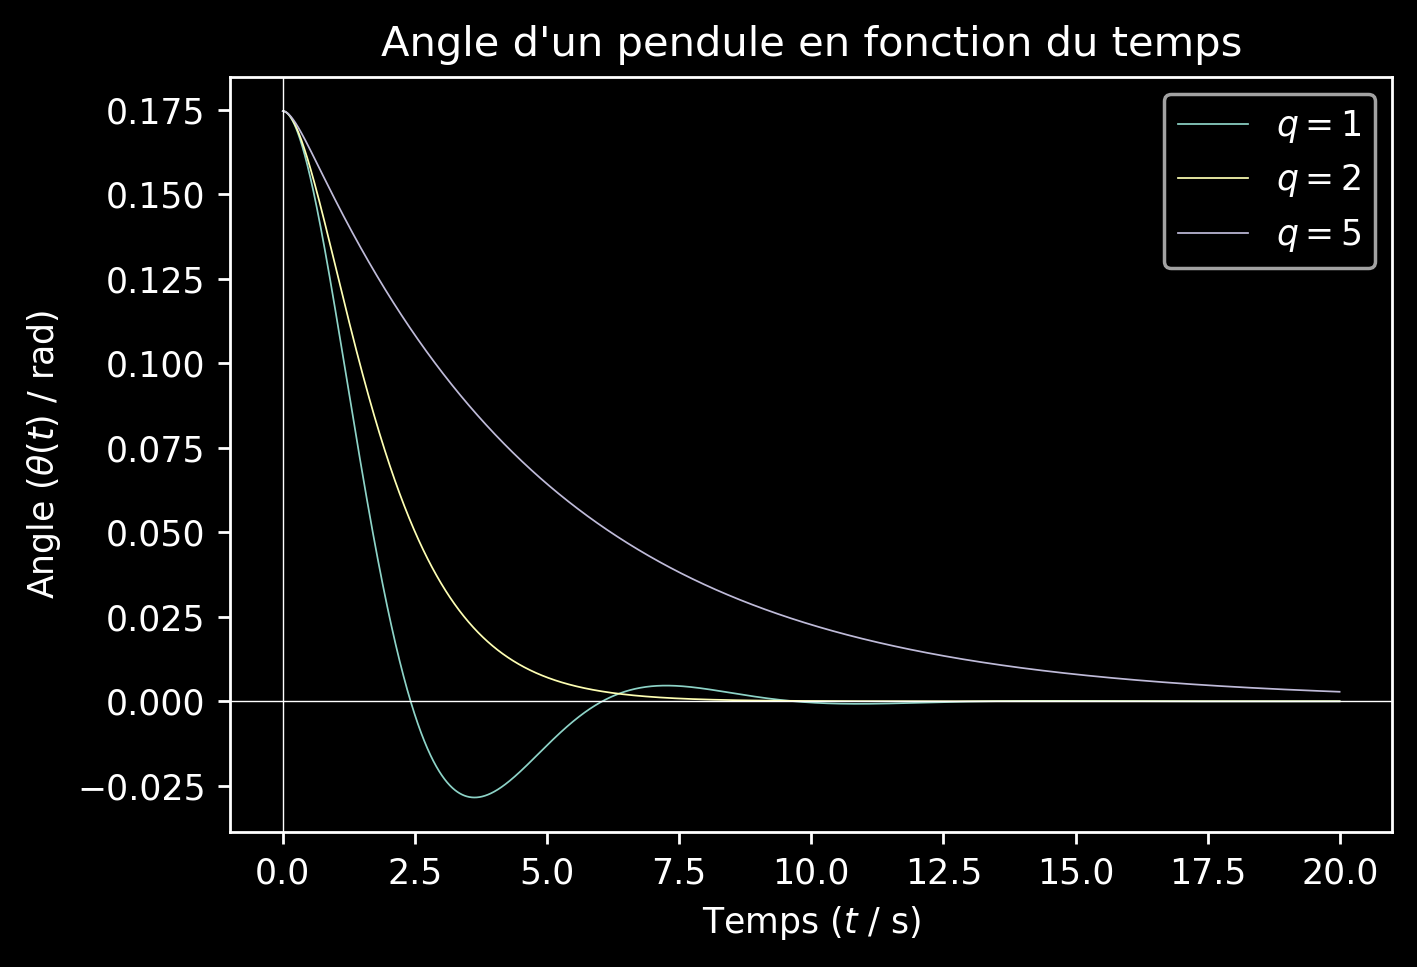

In [7]:
pendulum1a = rk4(1, 1, 1, None, 0, 20, 0.005, theta0, thetadot0, 1, 1)
pendulum1b = rk4(1, 2, 1, None, 0, 20, 0.005, theta0, thetadot0, 1, 1)
pendulum1c = rk4(1, 5, 1, None, 0, 20, 0.005, theta0, thetadot0, 1, 1)

plt.figure(dpi = imsize)
plt.plot(pendulum1a[:,0], pendulum1a[:,1], linewidth = 0.5, label = r"$q=1$")
plt.plot(pendulum1b[:,0], pendulum1b[:,1], linewidth = 0.5, label = r"$q=2$")
plt.plot(pendulum1c[:,0], pendulum1c[:,1], linewidth = 0.5, label = r"$q=5$")
plt.title("Angle d'un pendule en fonction du temps")
plt.ylabel(r"Angle ($\theta (t)$ / rad)")
plt.xlabel(r"Temps ($t$ / s)")
plt.axhline(0, color = "white", linewidth = 0.4)
plt.axvline(0, color = "white", linewidth = 0.4)
plt.legend()

La figure ci-dessus représente l'angle que fait le pendule avec l'horizontale en fonction du temps pour différentes valeurs de $q$. On constate que pour le cas $q=1$ le pendule effectue deux oscillations avant de s'arrêter à l'horizontale tandis que dans les cas $q=$ {$1, 2$} il n'effectue qu'une demi-oscillation avant de tendre vers $\theta = 0$. Pour $q=5$ (apériodique) le pendule et "trop" amorti et prend donc plus de temps pour s'arrêter. Dans le cas critique ($q=2$) le pendule tend très vite vers $\theta = 0$.

## Étude de l'évolution de l'énergie du système en fonction d'une force d'excitation:

On resolve maintenant l'équation pour le cas de pendule libre (sans amortissement), le cas de pendule amorti, et le pendule amorti avec une force d'excitation en second membre. On tracera la trajectoire dans les trois cas dans l'espace des phases où chaque point représente une énergie (couple de position et vitesse accessible en ce point).

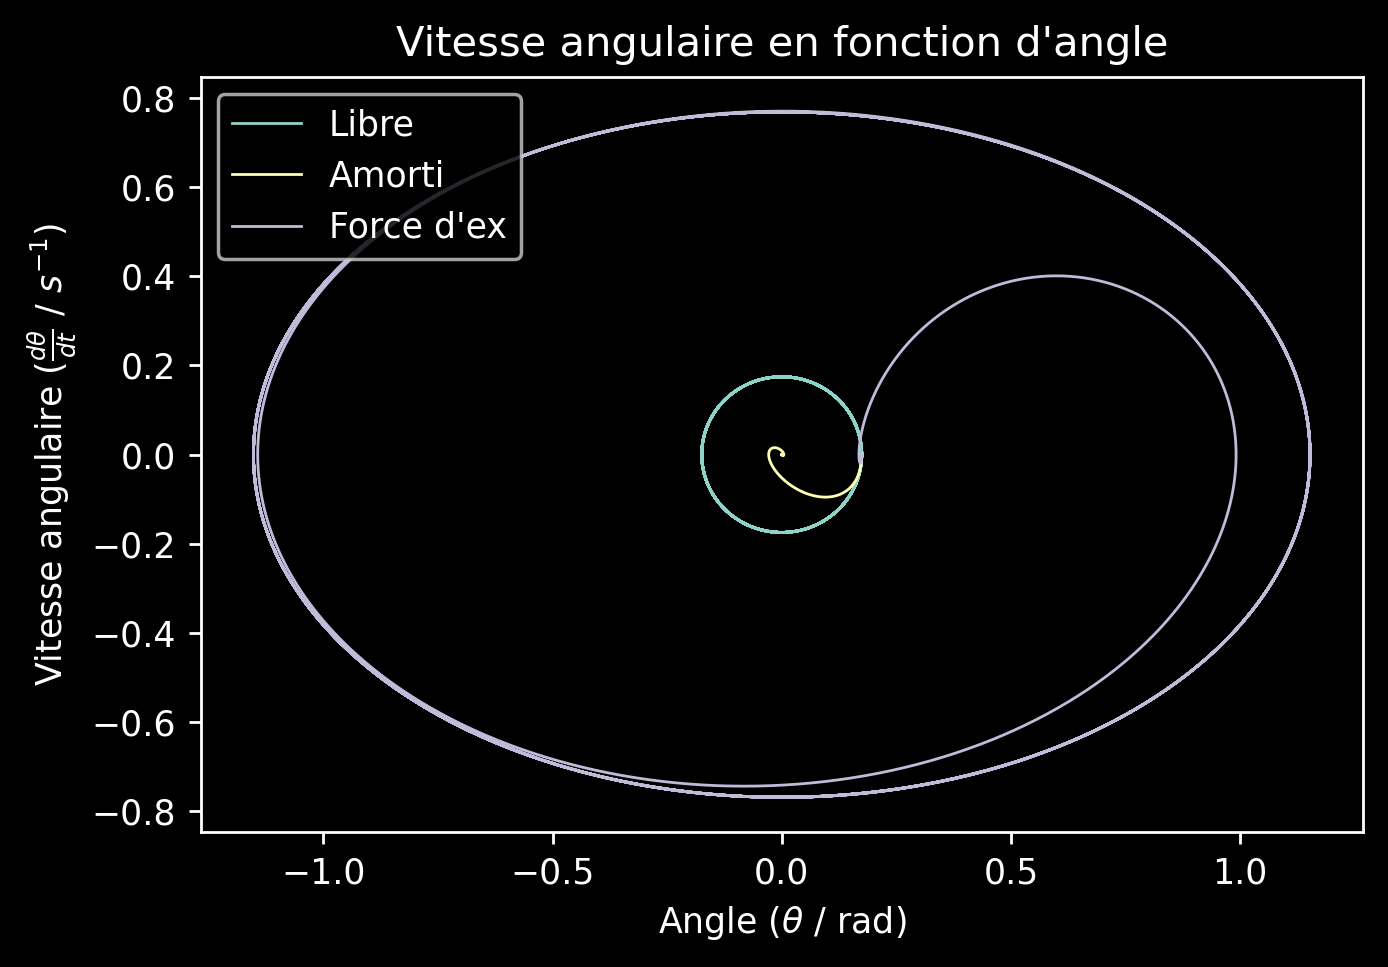

In [11]:
pendulum2libre = rk4(1, 0, 1, None, 0, 100, 10**(-2), theta0, thetadot0, 0, 2/3)
pendulum2amorti = rk4(1, 1, 1, None, 0, 100, 10**(-2), theta0, thetadot0, 0, 2/3)
pendulum2excite = rk4(1, 1, 1, cf, 0, 100, 10**(-2), theta0, thetadot0, 1, 2/3)

plt.figure(dpi = imsize)
plt.plot(pendulum2libre[:,1], pendulum2libre[:,2], linewidth = 0.8, label = r"Libre")
plt.plot(pendulum2amorti[:,1], pendulum2amorti[:,2], linewidth = 0.8, label = r"Amorti")
plt.plot(pendulum2excite[:,1], pendulum2excite[:,2], linewidth = 0.8, label = r"Force d'ex")
plt.title("Vitesse angulaire en fonction d'angle")
plt.ylabel(r"Vitesse angulaire ($\frac{d\theta}{dt}$ / $s^{-1}$)")
plt.xlabel(r"Angle ($\theta$ / rad)")
plt.legend()

On voit que chaque position admet deux vitesses possibles, une à l'allée et une autre au retour. La trajectoire du pendule libre est circulaire car il ne perd pas d'énergie, tandis que l'amortissement du deuxieme pendule fait que la vitesse tend vers $0$. Le pendule, sur lequel est exercé une force d'excitation, tend aussi vers une certaine trajectoire car il son mouvement est amorti, mais cette trajectoire est celle d'un pendule libre. Ce dernier est du au fait que la force d'excitation arrive à compenser exactement les forces de frottement qui entraînent l'amortissement.

## Étude du comportement chaotique du système:

On cherche ensuite à étudier le comportement chaotique de ce système qui apparaît notamment quand l'E.D. est non-linéaire, c'est à dire quand on n'applique plus l'approximation des petits angles. Dans la suite on fixe les paramètres: $\theta(t=0)=10\mathrm{~°}$, $\frac{\mathrm{d}\theta}{\mathrm{d}t}(t=0)=0$, $\Omega_e=2\Omega/3$, $q=0.5\mathrm{~s^{-1}}$.

## Le paramètre de la force d'excitation:

On trace la solution de l'E.D. pour plusieures valeures de $F_e=\{1.4,1.44,1.465,1.5\}\mathrm{~rad\cdot s^{-2}}$ pour analyser la sensibilité du système par rapport à ce paramètre.

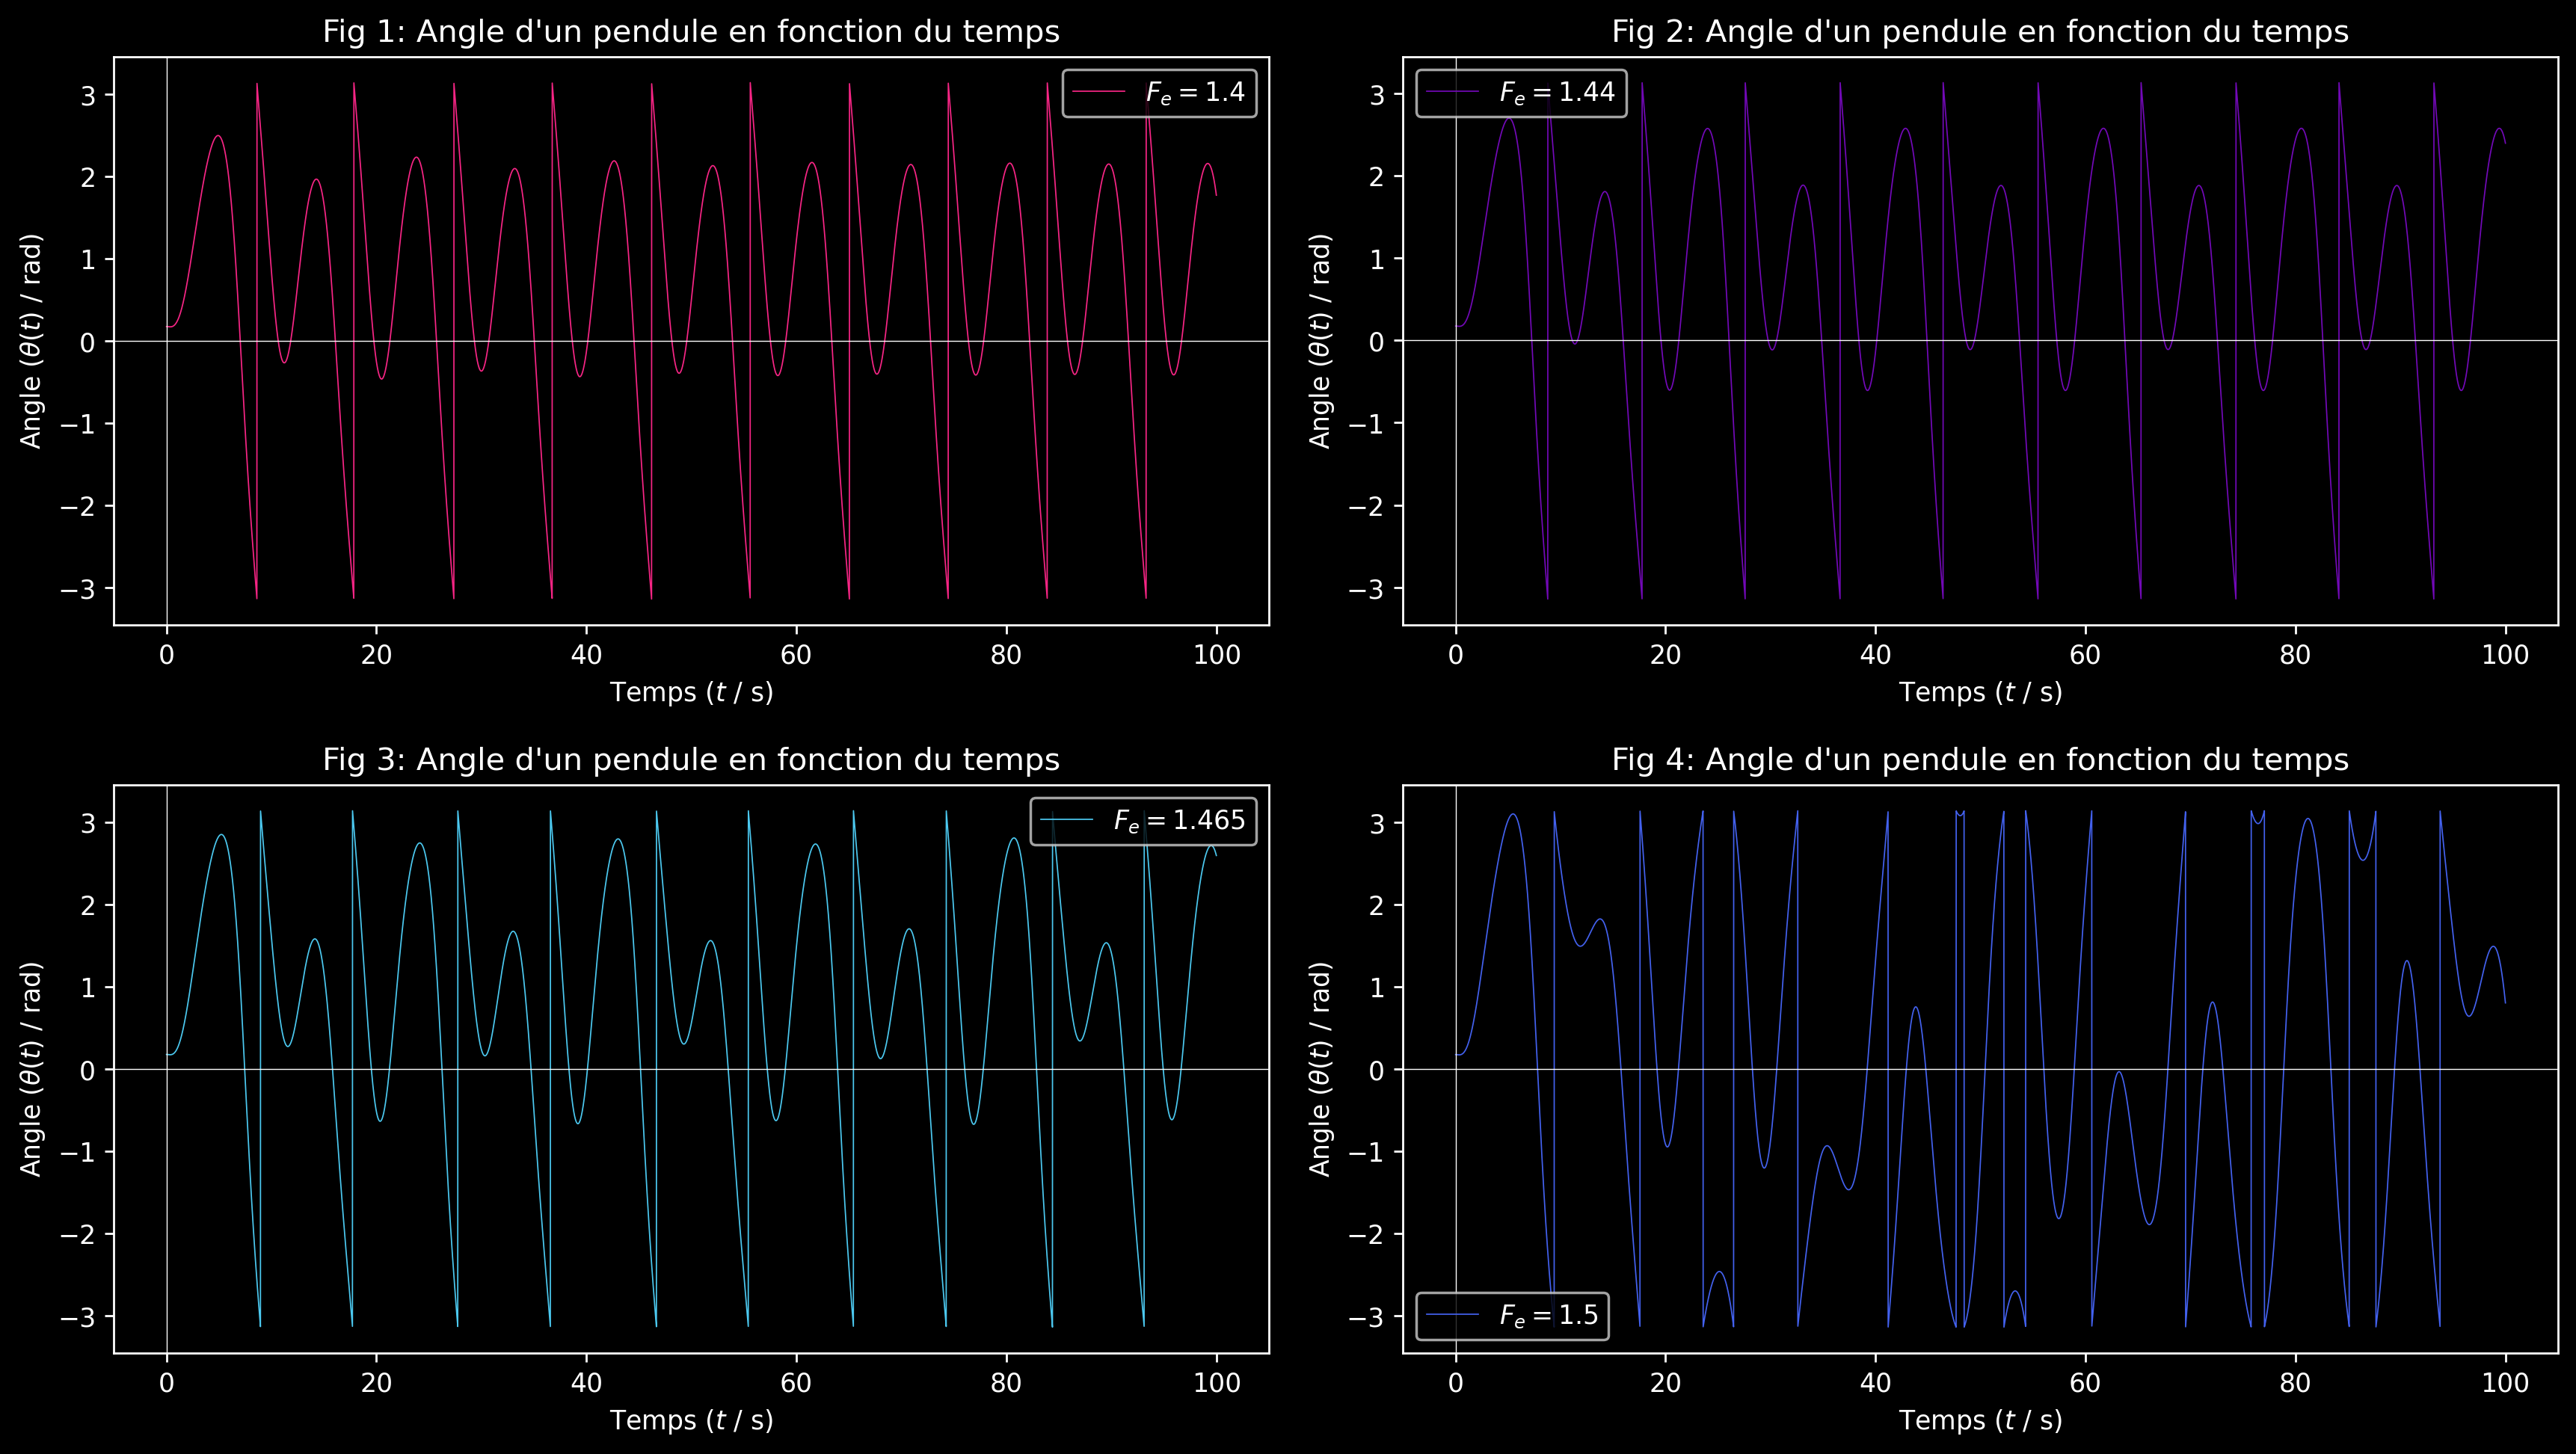

In [8]:
pendulum2a = rk4(1, 0.5, np.sin, cf, 0, 100, 10**(-2), theta0, thetadot0, 1.4, 2/3, False)
pendulum2b = rk4(1, 0.5, np.sin, cf, 0, 100, 10**(-2), theta0, thetadot0, 1.44, 2/3, False)
pendulum2c = rk4(1, 0.5, np.sin, cf, 0, 100, 10**(-2), theta0, thetadot0, 1.465, 2/3, False)
pendulum2d = rk4(1, 0.5, np.sin, cf, 0, 100, 10**(-2), theta0, thetadot0, 1.5, 2/3, False)

thetalimit = np.array((pendulum2a, pendulum2b, pendulum2c, pendulum2d))
for i in range(len(thetalimit)):
    for j in range(len(pendulum2b[:,1])):
        if np.abs((thetalimit[i])[j,1]) > np.pi :
            (thetalimit[i])[j, 1] = ((thetalimit[i])[j,1]+np.pi)%(np.sign((thetalimit[i])[j,1])*2*np.pi) - np.sign((thetalimit[i])[j,1])* np.pi

fig, axs = plt.subplots(2, 2, figsize=(14, 8), dpi=imsize)

pastel_colors = ['#F72585', '#7209B7', '#3A0CA3', '#4361EE', '#4CC9F0']

axs[0, 0].plot((thetalimit[0])[:,0], (thetalimit[0])[:,1], "-", linewidth=0.5, label=r"$F_e=1.4$", color=pastel_colors[0])
axs[0, 0].set_title("Fig 1: Angle d'un pendule en fonction du temps")
axs[0, 0].set_ylabel(r"Angle ($\theta (t)$ / rad)")
axs[0, 0].set_xlabel(r"Temps ($t$ / s)")
axs[0, 0].axhline(0, color="white", linewidth=0.4)
axs[0, 0].axvline(0, color="white", linewidth=0.4)
axs[0, 0].legend()

axs[0, 1].plot((thetalimit[1])[:,0], (thetalimit[1])[:,1], "-", linewidth=0.5, label=r"$F_e=1.44$", color=pastel_colors[1])
axs[0, 1].set_title("Fig 2: Angle d'un pendule en fonction du temps")
axs[0, 1].set_ylabel(r"Angle ($\theta (t)$ / rad)")
axs[0, 1].set_xlabel(r"Temps ($t$ / s)")
axs[0, 1].axhline(0, color="white", linewidth=0.4)
axs[0, 1].axvline(0, color="white", linewidth=0.4)
axs[0, 1].legend()

axs[1, 0].plot((thetalimit[2])[:,0], (thetalimit[2])[:,1], "-", linewidth=0.5, label=r"$F_e=1.465$", color=pastel_colors[4])
axs[1, 0].set_title("Fig 3: Angle d'un pendule en fonction du temps")
axs[1, 0].set_ylabel(r"Angle ($\theta (t)$ / rad)")
axs[1, 0].set_xlabel(r"Temps ($t$ / s)")
axs[1, 0].axhline(0, color="white", linewidth=0.4)
axs[1, 0].axvline(0, color="white", linewidth=0.4)
axs[1, 0].legend()

axs[1, 1].plot((thetalimit[3])[:,0], (thetalimit[3])[:,1], "-", linewidth=0.5, label=r"$F_e=1.5$", color=pastel_colors[3])
axs[1, 1].set_title("Fig 4: Angle d'un pendule en fonction du temps")
axs[1, 1].set_ylabel(r"Angle ($\theta (t)$ / rad)")
axs[1, 1].set_xlabel(r"Temps ($t$ / s)")
axs[1, 1].axhline(0, color="white", linewidth=0.4)
axs[1, 1].axvline(0, color="white", linewidth=0.4)
axs[1, 1].legend()

fig.tight_layout(pad=1.5)

Sur la figure 1 ($F_e=1.4N$) on observe que l'évolution de $\theta$ est assez regulier. Par contre dans les figures 2 et 3 ($F_e=\{1.44, 1.465\}N$) cette évolution devient de moins en moins regulier, même si elle reste stable (périodique). Dans la figure 4 ($F_e=1.5N$) l'évolution de $\theta$ n'est plus stable (apériodique). C'est un mouvement chaotique.

### Le paramètre $\theta$:

Maintenant, fixer le paramètre $F_e = 1.5N$ nous permettra de regarder la sensibilité du système aux conditions intiales et, plus précisement, $\theta(t=0)$. On resolvera l'E.D. pour $\theta(t=0)=10\mathrm{~°}$ et $\theta(t=0)=9.999\mathrm{~°}$. Ensuite on tracera la différence entre ces solutions.

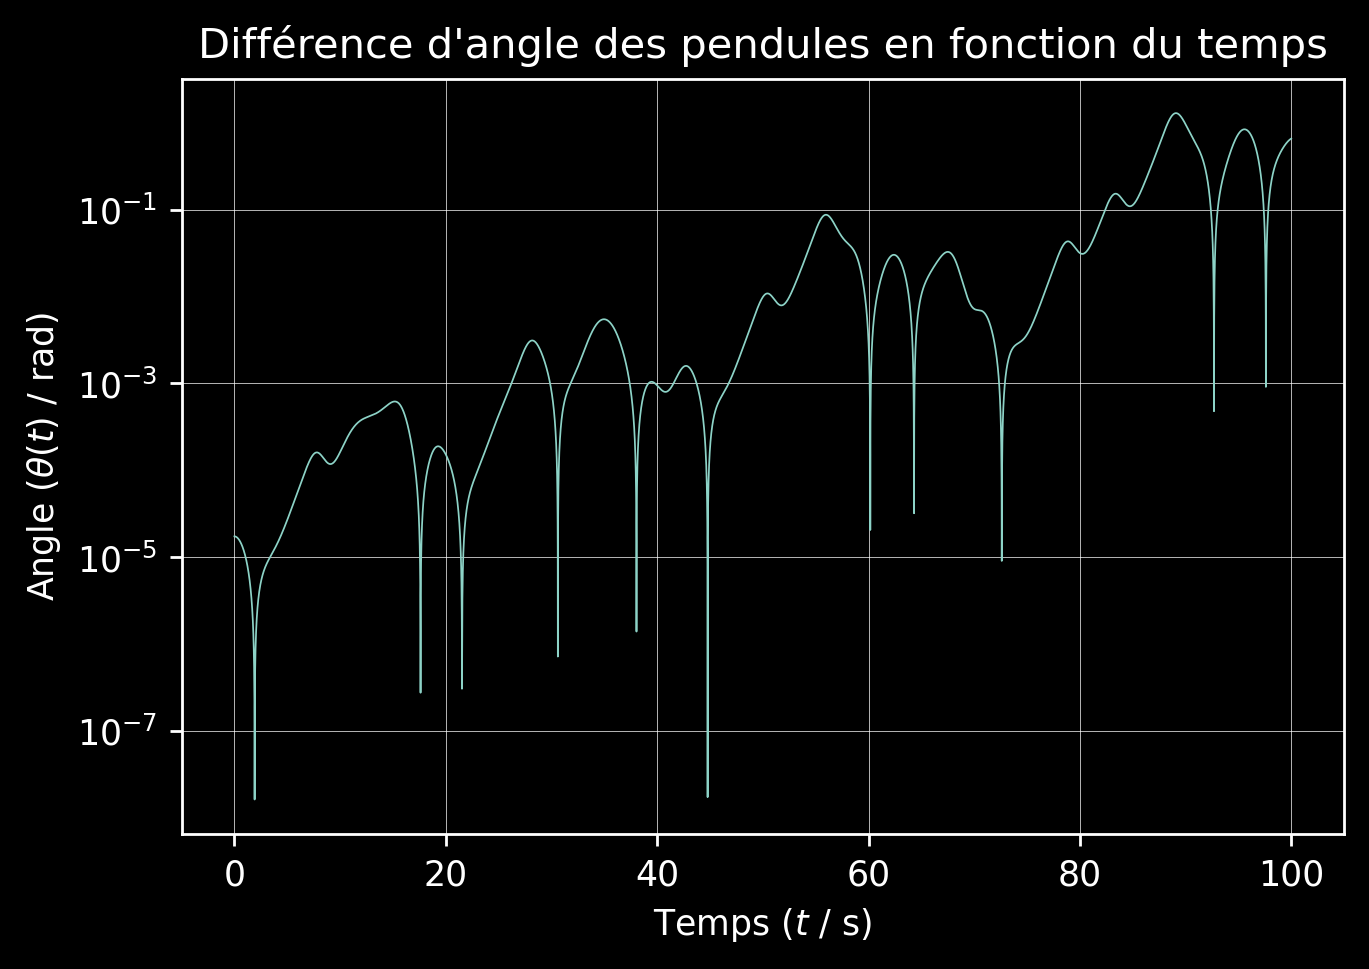

In [6]:
pendulumlast1 = rk4(1, 0.5, np.sin, cf, 0, 100, 10**(-2), theta0, thetadot0, 1.5, 2/3, False)
pendulumlast2 = rk4(1, 0.5, np.sin, cf, 0, 100, 10**(-2), np.radians(9.999), thetadot0, 1.5, 2/3, False)

plt.figure(dpi=imsize)
plt.plot(pendulumlast1[:,0], np.abs(pendulumlast1[:,1] - pendulumlast2[:,1]), linewidth = 0.5, label = r"$\Delta \theta_0=10^{-3}$ ")
plt.yscale("log")
plt.title("Différence d'angle des pendules en fonction du temps")
plt.ylabel(r"Angle ($\theta (t)$ / rad)")
plt.xlabel(r"Temps ($t$ / s)")
plt.grid(linewidth = 0.2)

plt.show()

On voit que, pour une différence d'angle d'environ $1.75 \times 10^{-5} rad$, la différence entre ces angles est d'ordre $10^{-3} rad$ au bout de $30s$ et même d'ordre $10^{0} rad$ après $100s$. Ces variations importantes pour des incrimentations petites sont charactaristique d'un système chaotique.

## Conclusion

En conclusion, ce projet a permis d'explorer les différentes propriétés du pendule simple en utilisant les équations différentielles. Dans un premier temps, on a étudié le mouvement du pendule amorti en faisant l'approximation des petits angles. La résolution numérique de l'équation différentielle linéaire avec la méthode RK4 a permis de tracer l'évolution de l'angle du pendule pour différents niveaux d'amortissement. On a pu observer les différents régimes du pendule pseudo-périodique, critique et apériodique.

Dans un deuxième temps, on a ajouté une force d'excitation au pendule et résolu numériquement l'équation du mouvement pour différents niveaux d'amortissement. On a tracé la trajectoire du pendule dans l'espace des phases pour les trois cas, à savoir pendule libre, pendule amorti et pendule amorti avec excitation. Les trajectoires montrent clairement l'effet de l'amortissement et de l'excitation sur le comportement du pendule.

Enfin, on a étudié le mouvement décrit par l'E.D. non-linéaire du pendule en la résolvant numériquement pour différentes valeurs de la force d'excitation. On a constaté que pour certaines valeurs de la force d'excitation, le mouvement du pendule devient chaotique.

En somme, ce projet a permis de mieux comprendre les propriétés physiques du pendule simple et l'effet de différents paramètres sur son mouvement. La résolution numérique des équations différentielles avec la méthode RK4 a permis de simuler le mouvement du pendule dans différents régimes et d'observer les trajectoires dans l'espace des phases.